In [168]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mltools import plot_data, plot_frontiere, make_grid, gen_arti


def reshape(w, x, y):
    """Reshape les entrées.

    Returns
    ----------
    w : array de taille (d, 1)
        Vecteur poids. 
    y : array de taille (n, 1)
        Labels.
    """
    return w.reshape(-1, 1), y.reshape(-1, 1)


def perceptron_loss(w, x, y):
    """Renvoie le coût d'un perceptron.

    Parameters
    ----------
    w : array de taille (d, 1)
        Vecteur poids.    
    x : array de taille (n, d)
        Données.
    y : array de taille (n, 1)
        Labels.

    Returns
    ----------
    z : array (n, 1)
        Coût du perceptron.
    """
    w, y = reshape(w, x, y)
    return np.maximum(0, -y * np.dot(x, w))


def perceptron_grad(w, x, y):
    """Renvoie le gradient d'un perceptron.

    Parameters
    ----------
    w : array de taille (d, 1)
        Vecteur poids.    
    x : array de taille (n, d)
        Données.
    y : array de taille (n, 1)
        Labels.

    Returns
    ----------
    z : array (n, d)
        Gradient du perceptron.
    """
    w, y = reshape(w, x, y)
    return np.where(perceptron_loss(w, x, y) <= 0, 0, -y * x)


def get_batches(x, y, batch_size=50):
    x.shape[0] // batch_size
    y.shape[0] // batch_size


class Lineaire(object):
    def __init__(
        self, loss=perceptron_loss, loss_g=perceptron_grad, max_iter=100, eps=0.01
    ):
        self.max_iter = max_iter
        self.eps = eps
        self.w = None
        self.loss = loss
        self.loss_g = loss_g

    def fit(self, datax, datay, batch_size=50, mode=None):
        """Performe une descente de gradient.
        
        Parameters
        ----------
        datax : array de taille (n, d)
            Données.
        datay : array de taille (n, 1)
            Labels.
        batch_size : int
            Nombre d'exemples par batchs pour la descente par mini-batch.

        Returns
        ----------
        w : array (d, 1)
            Vecteur poids optimal.
        weights : array(self.max_iter + 1, d, 10)
            Historique des vecteurs poids au fur et à mesure de la descente de gradient.
        losses : array(self.max_iter)
            Historique des coûts au fur et à mesure de la descente de gradient.
        """
        self.w = np.random.randn(datax.shape[1], 1)
        weights = [self.w]
        losses = []
        for _ in range(self.max_iter):
            if mode is None:
                self.w -= self.eps * self.loss_g(self.w, datax, datay).mean()
            elif mode == "stochastique":
                np.random.shuffle(datax)
                np.random.shuffle(datay)
                for rand in range(datax.shape[0]):
                    self.w -= (
                        self.eps * self.loss_g(self.w, datax[rand], datay[rand]).mean()
                    )
            elif mode == "minibatch":
                np.random.shuffle(datax)
                np.random.shuffle(datay)
                for i in range(0, datax.shape[0], batch_size):
                    self.w -= (
                        self.eps
                        * self.loss_g(
                            self.w, datax[i : i + batch_size], datay[i : i + batch_size]
                        ).mean()
                    )
            else:
                raise ValueError(
                    "mode must be one of {None, 'stochastique' or "
                    "'minibatch'}, got '%s' instead" % mode
                )
            losses.append(self.loss(self.w, datax, datay).mean())
            weights.append(self.w)
        return self.w, np.array(weights), np.array(losses)

    def predict(self, datax):
        """Infére le label des données."""
        return np.sign(np.dot(datax, self.w))

    def score(self, datax, datay):
        """Calcule le pourcentage de bonne classification sur le jeu de données
        passé en paramètre.
        """
        return np.mean(self.predict(datax) == datay)


def load_usps(fn):
    with open(fn, "r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split()) > 2]
    tmp = np.array(data)
    return tmp[:, 1:], tmp[:, 0].astype(int)


def get_usps(l, datax, datay):
    if type(l) != list:
        resx = datax[datay == l, :]
        resy = datay[datay == l]
        return resx, resy
    tmp = list(zip(*[get_usps(i, datax, datay) for i in l]))
    tmpx, tmpy = np.vstack(tmp[0]), np.hstack(tmp[1])
    return tmpx, tmpy


def show_usps(data):
    plt.imshow(data.reshape((16, 16)), interpolation="nearest", cmap="gray")


uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"
alltrainx, alltrainy = load_usps(uspsdatatrain)
alltestx, alltesty = load_usps(uspsdatatest)
neg = 6
pos = 9
datax, datay = get_usps([neg, pos], alltrainx, alltrainy)
testx, testy = get_usps([neg, pos], alltestx, alltesty)

testy = np.where(testy == neg, -1, 1)


0.5097957793852619


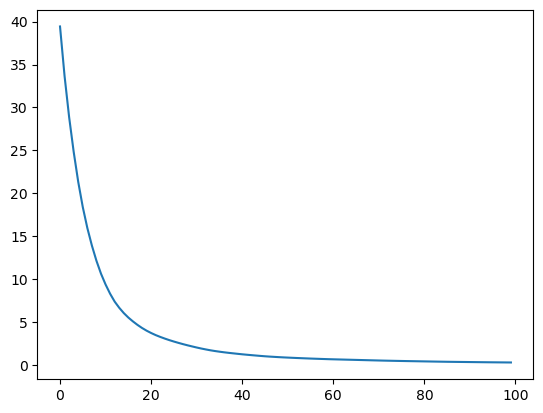

In [169]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax,datay)
score = model.score(testx, testy)
print(score)
plt.plot(loss_tab)

In [173]:
loss_tab.shape

(100,)

0.5100864553314121


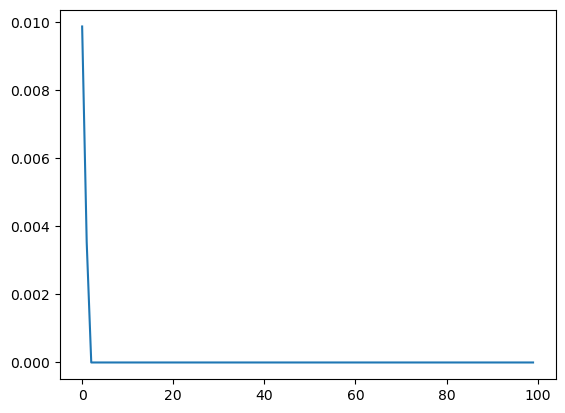

In [176]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax,datay,mode="stochastique")
score = model.score(testx, testy)
print(score)
plt.plot(loss_tab)

0.510028320142182


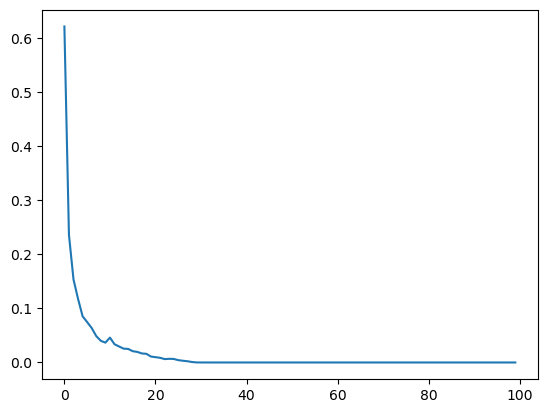

In [171]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax, datay, mode="minibatch")
score = model.score(testx, testy)
print(score)
plt.plot(loss_tab)

0.5100864553314121


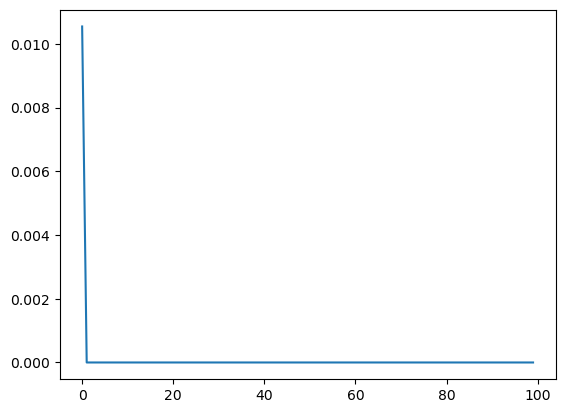

In [177]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax, datay, batch_size=1, mode="minibatch")
score = model.score(testx, testy)
print(score)
plt.plot(loss_tab)

0.5098539145744919


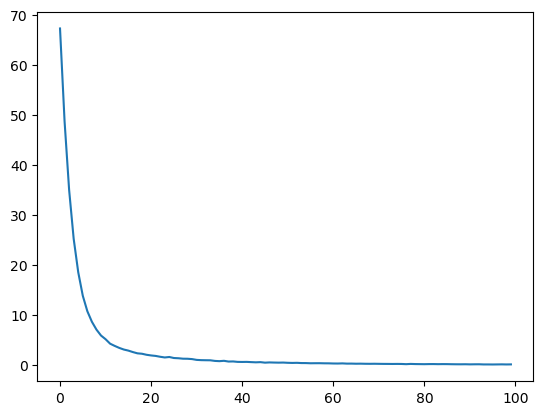

In [175]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax, datay, batch_size=datax.shape[0], mode="minibatch")
score = model.score(testx, testy)
print(score)
plt.plot(loss_tab)